In [3]:
import numpy as np
poly_param = np.array([0.0025, 0,  0.02299874])
poly_param[1], poly_param[0]

(0.0, 0.0025)

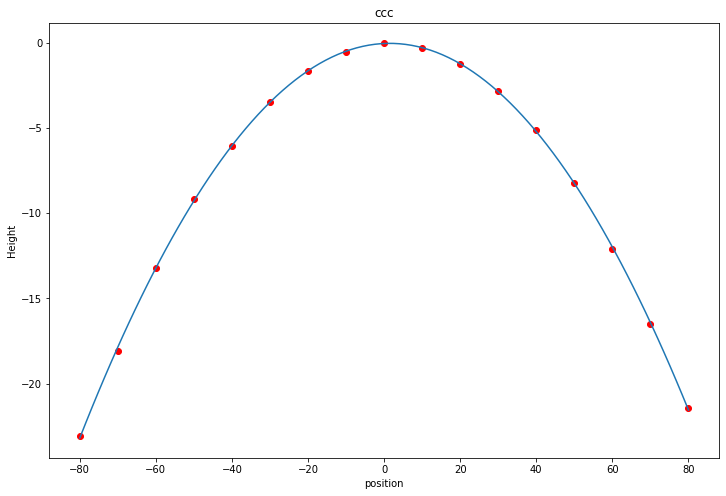

array([-0.00348678,  0.01026121, -0.04706285])

In [22]:
    import numpy as np
    import matplotlib.pyplot as plt
    
    #Four saddles, measured Jan 7, 2021 NB 12/20 p6.
    #fifth saddle, P3, measured Jan 13, 2021 NB 12/20 P13
    
  #Saddle 1 (W1)
    pos = np.array([-80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60, 70, 80])
    #pos = np.array([-70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60, 70])  #for most negative curve.
    
    z_1p = np.array([713, 554, 414, 284, 184, 103, 44, 9.5, 0.5, 6.1, 47.4, 108.1, 189.5, 290.5, 416, 596, 766])
    z_1m = np.array([385, 534, 653, 755, 847, 914, 963, 993, 1000, 990, 962, 915, 845, 758, 649, 524, 379])
    z_1m = z_1m - 1000
    
    #Convert units
    z_1p = (z_1p/1000)*25.4     #to millimeters.
    z_1m = (z_1m/1000)*25.4     #to millimeters.
    
  #Saddle 2 (W2)
    z_2p = np.array([844, 671, 522, 390, 288, 205, 150, 114, 100, 112, 146, 199, 280, 381, 504, 656, 835 ])
    z_2m = np.array([302, 461, 601, 723, 824, 903, 956, 990, 1000, 990, 957, 904, 829, 729, 609, 470, 310])
    z_2m = z_2m - 1000
    
    #Convert units
    z_2p = (z_2p/1000)*25.4     #to millimeters.
    z_2m = (z_2m/1000)*25.4     #to millimeters.

  #Saddle 3 (P1)
    z_3p = np.array([674, 510, 370, 251, 157, 84, 34, 6, 0, 10, 48, 98, 176, 274, 395, 541, 705])
    z_3m = np.array([281, 452, 595, 719, 822, 900, 954, 987, 1000, 986, 950, 888, 805, 698, 569, 420, 249])
    z_3m = z_3m - 1000
    
    #Convert units
    z_3p = (z_3p/1000)*25.4     #to millimeters.
    z_3m = (z_3m/1000)*25.4     #to millimeters.
    
  #Saddle 4 (P2)
    z_4p = np.array([680, 521, 379, 258, 168, 94, 41, 10, 0, 11, 44, 93, 171, 268, 389, 527, 687])
    z_4m = np.array([385, 531, 654, 760, 847, 914, 961, 990, 1000, 991, 962, 914, 846, 756, 650, 522, 370])
    z_4m = z_4m - 1000  
    
    #Convert units
    z_4p = (z_4p/1000)*25.4     #to millimeters.
    z_4m = (z_4m/1000)*25.4     #to millimeters.

 #Saddle 5 (P3)
    z_5p = np.array([696, 533, 389, 268, 173, 99, 45, 12, 0, 10, 39, 88, 159, 258, 367, 510, 670])
    z_5m = np.array([754, 808, 858, 902, 939, 965, 986, 995, 1000, 997, 984, 965, 938, 902, 857, 809, 749])
    z_5m = z_5m - 1000  
    
    #Convert units
    z_5p = (z_5p/1000)*25.4     #to millimeters.
    z_5m = (z_5m/1000)*25.4     #to millimeters.

    
    #Saddle 6 (P4)
    z_6p = np.array([683, 528, 387, 259, 168, 95, 43, 12, 0, 12, 45, 100, 171, 269, 395, 527, 680])
    z_6m = np.array([208, 442, 640, 805, 930, 1022, 1078, 1100, 1088, 1038, 951, 825, 670, 470, 249])   #use position array with fewer points.  Could not get +/- 80 mm for this curve.
    z_6m = z_6m - 1100  #one case in which max is set to 1.1"
    
    #Convert units
    z_6p = (z_6p/1000)*25.4     #to millimeters.
    z_6m = (z_6m/1000)*25.4     #to millimeters.

 #Saddle 7(P5)
    z_7p = np.array([700, 525, 385, 269, 170, 96, 41, 10, 0, 9, 37, 88, 160, 257, 372, 515, 674])
    z_7m = np.array([110, 304, 491, 647, 767, 867, 935, 979, 1000, 989, 951, 890, 802, 683, 533, 364, 174])
    z_7m = z_7m - 1000  
    
    #Convert units
    z_7p = (z_7p/1000)*25.4     #to millimeters.
    z_7m = (z_7m/1000)*25.4     #to millimeters.

    
    #Choose particular data set
    
    z=z_7m

    #make corrections due to finite radius of probe.
    #See NB 12/20 p8.
    #Correction is a function of position alone.
    R = 25.4/8     #radius is 1/8"
    poly_2 = poly_param[0] #value from fit of square term
    poly_1 = poly_param[1]    #value from fit of linear term
    slope = poly_1+2*poly_2*pos
    correction = 0 * slope    #test for zero correction.  Comment out following line to use this line.
    correction = R*(np.sqrt(1 + slope**2) - 1)
    z=z-correction      #All corrections decrease the number.
    
    
    #fit to polynomial
    poly_param = np.polyfit(pos, z, 2)
    p = np.poly1d(poly_param)
    x = np.linspace(-80,80,100)
    z_fit= p(x)

    
    #fig = plt.figure()
    fig = plt.figure(figsize=(12, 8))
    plt.title('ccc')
    plt.xlabel('position')
    plt.ylabel('Height')
    plt.plot(pos, z, 'ro')
    plt.plot(x,z_fit)
    
    plt.show()
    poly_param

In [9]:
poly_param[0]

0.0026700387765147835